In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [107]:
directory = 'fashion_MNIST_checkpoint'
epochs = 30
optimizer = Adagrad(learning_rate=0.005,initial_accumulator_value=0.05,epsilon=1e-6)

model_checkpoint_callback = ModelCheckpoint(
    filepath=directory,
    save_weights_only=True,
    monitor='categorical_cross_entropy',
    mode='max',
    save_best_only=True)
reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor = 0.2,
    patience = 5,
    min_lr = 0.0001
)

In [108]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images/255.0
test_images = test_images/255.0
print([train_images.shape,test_images.shape,train_labels.shape,test_labels.shape])

[(60000, 28, 28), (10000, 28, 28), (60000,), (10000,)]


In [109]:
size = 28
train_count = len(train_images)
test_count = len(test_images)
input_shape = (size,size,1)
train_images_shaped = train_images.reshape(train_count,size,size,1)
test_images_shaped = test_images.reshape(test_count,size,size,1)
train_labels_shaped = to_categorical(train_labels)
test_labels_shaped = to_categorical(test_labels)

In [110]:
model = Sequential()
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

In [111]:
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=[CategoricalCrossentropy(),CategoricalAccuracy()])

In [112]:
history = model.fit(
    train_images_shaped,
    train_labels_shaped,
    epochs=epochs,
    callbacks=[model_checkpoint_callback,reduce_lr])

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7719 - categorical_crossentropy: 0.7719 - categorical_accuracy: 0.7425
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4390 - categorical_crossentropy: 0.4390 - categorical_accuracy: 0.8456
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4098 - categorical_crossentropy: 0.4098 - categorical_accuracy: 0.8554
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3900 - categorical_crossentropy: 0.3900 - categorical_accuracy: 0.8612
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3737 - categorical_crossentropy: 0.3737 - categorical_accuracy: 0.8660
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3660 - categorical_crossentropy: 0.3660 - categorical_accuracy: 0.8690
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3601 - categorical_cr

In [113]:
model.evaluate(test_images_shaped,test_labels_shaped)

313/313 [==============================] - 1s 4ms/step - loss: 0.3779 - categorical_crossentropy: 0.3777 - categorical_accuracy: 0.8622


[0.3779473304748535, 0.3776867389678955, 0.8622000217437744]

In [114]:
test_labels_predicted = np.argmax(model.predict(test_images_shaped), axis=1)

Text(0.5, 45.722222222222214, 'Predicted')

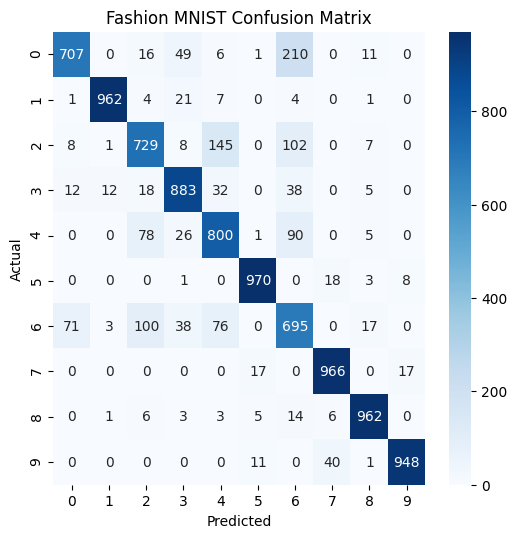

In [132]:
cm = confusion_matrix(test_labels, test_labels_predicted)
plt.figure(dpi=100,figsize=(6,6))
ax=plt.gca()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues',ax=ax)
plt.title("Fashion MNIST Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [118]:
import pandas as pd
training_data = pd.DataFrame(history.history)

In [119]:
training_data

,loss,categorical_crossentropy,categorical_accuracy,lr
0,0.565573,0.565573,0.805150,0.005
1,0.432304,0.432304,0.847500,0.005
2,0.403060,0.403060,0.857900,0.005
3,0.384681,0.384681,0.863117,0.005
4,0.373374,0.373374,0.867517,0.005
5,0.363505,0.363505,0.870133,0.005
6,0.357055,0.357055,0.872683,0.005
7,0.350761,0.350761,0.875033,0.005
8,0.345142,0.345142,0.876850,0.005
9,0.340192,0.340192,0.878250,0.005


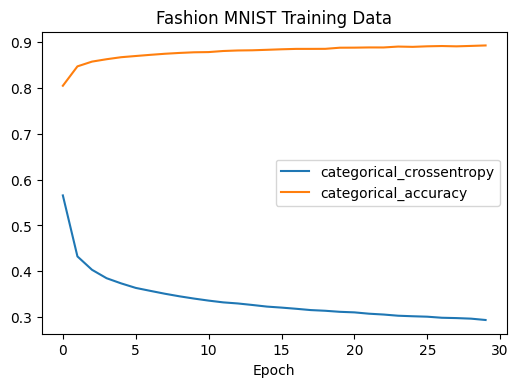

In [133]:
plt.figure(dpi=100)
plt.title("Fashion MNIST Training Data")
plt.xlabel("Epoch")
ax = plt.gca()
training_data['categorical_crossentropy'].plot(ax=ax)
training_data['categorical_accuracy'].plot(ax=ax)
plt.legend()

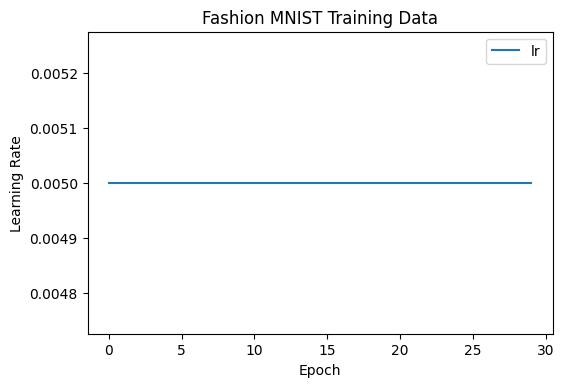

In [136]:
plt.figure(dpi=100)
plt.title("Fashion MNIST Training Data")
plt.ylabel("Learning Rate")
plt.xlabel("Epoch")
ax = plt.gca()
training_data['lr'].plot(ax=ax)
plt.legend()